# 케라스 모델의 파라미터들과 기타 기법들

## verbose
model `fit`, `predict` 에서 사용하는 파라미터임.  


In [6]:
# 데이터 준비 
import numpy as np 
x_train = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]])
y_train = np.array([6, 7, 8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print('x_train.shape : ', x_train.shape)
print('y_train.shape : ', y_train.shape)

# 모델 구성 
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()

model.add(LSTM(7, input_shape=(5, 1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

model.summary()

# 3. 훈련
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=1)

# 4. 평가 예측
x_predict = np.array([[4, 5, 6, 7, 8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print('x_predict : ', x_predict.shape)

y_predict = model.predict(x_predict)
print('예측값 : ', y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 45.1057 - mse: 45.1057
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 45.0710 - mse: 45.0710
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 42.3950 - mse: 42.3950
Epoch 4/100
3/3 [==============================] - 0s 2

3/3 [==============================] - 0s 2ms/step - loss: 1.5619 - mse: 1.5619
Epoch 81/100
3/3 [==============================] - 0s 2ms/step - loss: 1.2937 - mse: 1.2937
Epoch 82/100
3/3 [==============================] - 0s 2ms/step - loss: 2.5075 - mse: 2.5075
Epoch 83/100
3/3 [==============================] - 0s 2ms/step - loss: 1.2811 - mse: 1.2811
Epoch 84/100
3/3 [==============================] - 0s 2ms/step - loss: 2.4888 - mse: 2.4888
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 2.3490 - mse: 2.3490
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 1.9364 - mse: 1.9364
Epoch 87/100
3/3 [==============================] - 0s 2ms/step - loss: 1.5288 - mse: 1.5288
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 2.2973 - mse: 2.2973
Epoch 89/100
3/3 [==============================] - 0s 2ms/step - loss: 2.2680 - mse: 2.2680
Epoch 90/100
3/3 [==============================] - 0s 2ms/step - loss: 1.5316 - ms

verbose 인잣값을 0을 주게되면 훈련하는 모습이 나타나지 않습니다.  
많은 데이터를 훈련한다면 어느정도 속도를 지연할 수 있음. 그럴때 0을 주면 시간을 조금이나마 단축할 수 있지만, 학습되는 과정이 보이지 않음 

1이 기본값이라 verbose=1을 주게되면 똑같이 1에폭씩 보여주게됨.  

먼저 진행상황들을 보여주고, 훈련되고있는 loss 값과 metrics에 명시한 값들을 보여줌 

verbose = 2 를 주게되면 loss와 metrics 만 화면에 간단하게 출력되고, 훈련이 진행되는 progress바가 나오지 않음 

## EarlyStopping 
모델을 짯을때 1만번의 훈련을 시켰는데 3천번 정도에 loss 값이 떨어지지 않는 최저값이 나오는 경우가 많이 있음  
이후에는 오히려 성능이 떨어지는 과접합 단계로 빠지게됨.  이것을 수동으로 변경하지 않고, 케라스에서 어느정도 결과값이 나오면 학습을 멈추어주는 기능을 제공함. 

`fit` 부분의 옵션값으로 설정할 수 있음

In [7]:
# 데이터 준비 
import numpy as np 
x_train = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]])
y_train = np.array([6, 7, 8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print('x_train.shape : ', x_train.shape)
print('y_train.shape : ', y_train.shape)

# 모델 구성 
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()

model.add(LSTM(7, input_shape=(5, 1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

model.summary()

# 3. 훈련
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

model.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=2, callbacks=[early_stopping])

# 4. 평가 예측
x_predict = np.array([[4, 5, 6, 7, 8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print('x_predict : ', x_predict.shape)

y_predict = model.predict(x_predict)
print('예측값 : ', y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 - 1s - loss: 69.2922 - mse: 69.2922
Epoch 2/1000
3/3 - 0s - loss: 65.6594 - mse: 65.6594
Epoch 3/1000
3/3 - 0s - loss: 61.3724 - mse: 61.3724
Epoch 4/1000
3/3 - 0s - loss: 58.4316 - mse: 58.4316
Epoch 5/1000
3/3 - 0s - loss: 54.7441 - mse: 54.7441
Epoch 6/1000
3/3 - 0s - loss: 51.0664 - mse: 51.0664
Epoch 7/1000
3/3 - 

Epoch 142/1000
3/3 - 0s - loss: 0.0937 - mse: 0.0937
Epoch 143/1000
3/3 - 0s - loss: 0.0902 - mse: 0.0902
Epoch 144/1000
3/3 - 0s - loss: 0.0896 - mse: 0.0896
Epoch 145/1000
3/3 - 0s - loss: 0.0874 - mse: 0.0874
Epoch 146/1000
3/3 - 0s - loss: 0.0872 - mse: 0.0872
Epoch 147/1000
3/3 - 0s - loss: 0.0842 - mse: 0.0842
Epoch 148/1000
3/3 - 0s - loss: 0.0836 - mse: 0.0836
Epoch 149/1000
3/3 - 0s - loss: 0.0820 - mse: 0.0820
Epoch 150/1000
3/3 - 0s - loss: 0.0806 - mse: 0.0806
Epoch 151/1000
3/3 - 0s - loss: 0.0792 - mse: 0.0792
Epoch 152/1000
3/3 - 0s - loss: 0.0801 - mse: 0.0801
Epoch 153/1000
3/3 - 0s - loss: 0.0767 - mse: 0.0767
Epoch 154/1000
3/3 - 0s - loss: 0.0753 - mse: 0.0753
Epoch 155/1000
3/3 - 0s - loss: 0.0753 - mse: 0.0753
Epoch 156/1000
3/3 - 0s - loss: 0.0738 - mse: 0.0738
Epoch 157/1000
3/3 - 0s - loss: 0.0721 - mse: 0.0721
Epoch 158/1000
3/3 - 0s - loss: 0.0710 - mse: 0.0710
Epoch 159/1000
3/3 - 0s - loss: 0.0703 - mse: 0.0703
Epoch 160/1000
3/3 - 0s - loss: 0.0689 - mse: 

Epoch 297/1000
3/3 - 0s - loss: 0.0132 - mse: 0.0132
Epoch 298/1000
3/3 - 0s - loss: 0.0130 - mse: 0.0130
Epoch 299/1000
3/3 - 0s - loss: 0.0133 - mse: 0.0133
Epoch 300/1000
3/3 - 0s - loss: 0.0131 - mse: 0.0131
Epoch 301/1000
3/3 - 0s - loss: 0.0133 - mse: 0.0133
Epoch 302/1000
3/3 - 0s - loss: 0.0128 - mse: 0.0128
Epoch 303/1000
3/3 - 0s - loss: 0.0129 - mse: 0.0129
Epoch 304/1000
3/3 - 0s - loss: 0.0128 - mse: 0.0128
Epoch 305/1000
3/3 - 0s - loss: 0.0125 - mse: 0.0125
Epoch 306/1000
3/3 - 0s - loss: 0.0129 - mse: 0.0129
Epoch 307/1000
3/3 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 308/1000
3/3 - 0s - loss: 0.0125 - mse: 0.0125
Epoch 309/1000
3/3 - 0s - loss: 0.0126 - mse: 0.0126
Epoch 310/1000
3/3 - 0s - loss: 0.0125 - mse: 0.0125
Epoch 311/1000
3/3 - 0s - loss: 0.0122 - mse: 0.0122
Epoch 312/1000
3/3 - 0s - loss: 0.0122 - mse: 0.0122
Epoch 313/1000
3/3 - 0s - loss: 0.0122 - mse: 0.0122
Epoch 314/1000
3/3 - 0s - loss: 0.0127 - mse: 0.0127
Epoch 315/1000
3/3 - 0s - loss: 0.0120 - mse: 

Epoch 452/1000
3/3 - 0s - loss: 0.0107 - mse: 0.0107
Epoch 453/1000
3/3 - 0s - loss: 0.0106 - mse: 0.0106
(1, 5)
x_predict :  (1, 5, 1)
예측값 :  [[8.426461]]


* monitor 는 확인할 대상(loss)
* patiencs 는 성능이 증가하지 않을때 epoch 의 최대 반복 횟수
* mode 는 loss 값에 적용할 모드

결국 monior=loss, patience=10, mode='min' 이라는 뜻은 loss 값이 10번 이상 변함이 없거나 올라가면 학습을 중지하게 됨.  
fit의 callback 이라는 파라미터에 리스트 형태로 입력해주면 됨. 

epochs 수를 1000번으로 줬을때, 453번째 epoch 에서 중단된 것을 확인할 수 있음

## TensorBoard
직접 만든 모델을 시각화해서 보겠음. 모델을 만들고 우리는 summary 만을 이용해서 확인해 보았음  
이것을 웹에서 깔끔하게 볼 수 있게 도와주는 TensorBoard 라는 것이 있음. 

TensorBoard를 사용하기 위해 `keras.callbacks`에 있는 TensorBoard를 import 해줌.  
그리고 변수에 정의해줌. 

In [8]:
# 데이터 준비 
import numpy as np 
x_train = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]])
y_train = np.array([6, 7, 8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print('x_train.shape : ', x_train.shape)
print('y_train.shape : ', y_train.shape)

# 모델 구성 
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()

model.add(LSTM(7, input_shape=(5, 1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

model.summary()

# 3. 훈련
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')
tb_hist = TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

model.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=2, callbacks=[early_stopping, tb_hist])

# 4. 평가 예측
x_predict = np.array([[4, 5, 6, 7, 8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print('x_predict : ', x_predict.shape)

y_predict = model.predict(x_predict)
print('예측값 : ', y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 - 1s - loss: 50.9845 - mse: 50.9845
Epoch 2/1000
3/3 - 0s - loss: 50.7795 - mse: 50.7795
Epoch 3/1000
3/3 - 0s - loss: 50.5878 - mse: 50.5878
Epoch 4/1000
3/3 - 0s - loss: 50.4109 - mse: 50.4109
Epoch 5/1000
3/3 - 0s - loss: 50.2210 - mse: 50.2210
Epoch 6/1000
3/3 - 0s - loss: 50.0423 - mse: 50.0423
Epoch 7/1000
3/3 - 

log_dir 이라는 인자값이 graph 폴더를 만들 경로를 의미함.  
그래서 프롬프트에 해당 경로로 가서 tensorboard --logdir=`경로` 를 입력해주면 텐서보드에 접속할 수 있는 주소가 뜸

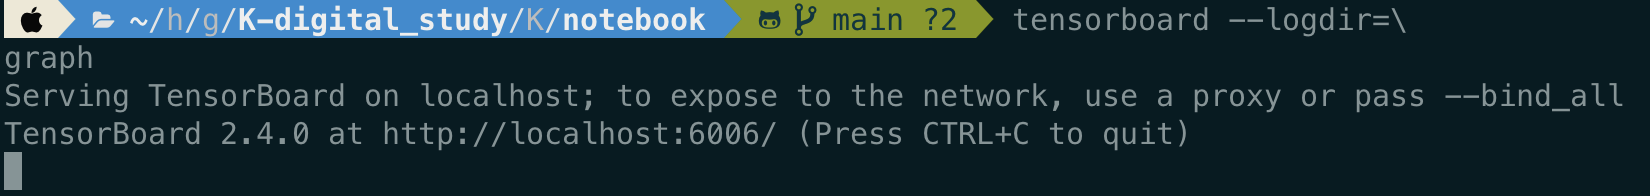

접속하면 loss나 mse의 값을 그래프로 볼 수 있고, 모델의 구성도 확인할 수 있음.  

## 모델의 Save
모델을 저장하고 불러오는 방법에 대해서 알아봄.  
수많은 딥러닝 모델들은 재사용이 가능함.  
어느정도 모델링이 가능해지면 어려워지는 것은 데이터 전처리임.   
깔끔하게 정제된 데이터를 만드는 것은 매우매우 어려움

In [9]:
# 모델 구성 
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()

model.add(LSTM(7, input_shape=(5, 1), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

In [10]:
model.save('../model/test_save.h5')

model 객체에 save 를 사용하여 저장이 가능함. 저장할 경로와 저장할 이름.h5 확장자로 저장하면 됨. 

## 모델의 Load

`keras.model` 에서 `load_model` 를 import 해줘야 함  
그런 다음 model 객체에 `load_model('경로')`를 사용하여 모델을 로드해주면 됨.

In [11]:
# 모델 구성 
from keras.models import load_model
model = load_model('../model/test_save.h5')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


불러온 모델을 그대로 사용하는 것이 아닌 재사용할 수 있음. 불러와서 새로운 레이어들을 추가해 줄 수도 있음. 

In [13]:
# model 을 불러오기
model = load_model('../model/test_save.h5')

# Dense 레이어 하나를 추가 
model.add(Dense(1, name='dense_x'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
_________________________________________________________________
dense_x (Dense)              (None, 1)                 2         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


Dense의 인잣값으로 name 을 주어서 layer에 이름을 명시해 줄 수 있음. 

새로 불러온 모델 + Dense 추가한 모델이 잘 작동하는지 확인함  
이런 식으로 다른 사람이 만든 모델이나, 내가 만든 모델들을 불러와 재 사용할 수 있음.  
이는 상당히 효율적인 관리가 가능한 방식임  

In [14]:
# 데이터 준비 
import numpy as np 
x_train = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]])
y_train = np.array([6, 7, 8])

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

print('x_train.shape : ', x_train.shape)
print('y_train.shape : ', y_train.shape)

# 모델 구성 
# model 을 불러오기
model = load_model('../model/test_save.h5')

# Dense 레이어 하나를 추가 
model.add(Dense(1, name='dense_x'))

model.summary()

# 3. 훈련
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')
tb_hist = TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

model.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=2, callbacks=[early_stopping, tb_hist])

# 4. 평가 예측
x_predict = np.array([[4, 5, 6, 7, 8]])
print(x_predict.shape)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print('x_predict : ', x_predict.shape)

y_predict = model.predict(x_predict)
print('예측값 : ', y_predict)

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
_________________________________________________________________
dense_x (Dense)              (None, 1)                 2         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 - 1s - loss: 5.6023 - mse: 5.6023
Epoch 2/1000
3/3 - 0s - loss: 4.5682 - mse: 4.5682
Epoch 3/1000
3/3 - 0s - loss: 3.6397 - mse: 3.6397
Epoch 4/1000
3/3 - 0s - loss: 2.8288 - mse: 2.8288
E

Epoch 138/1000
3/3 - 0s - loss: 0.0119 - mse: 0.0119
Epoch 139/1000
3/3 - 0s - loss: 0.0111 - mse: 0.0111
Epoch 140/1000
3/3 - 0s - loss: 0.0103 - mse: 0.0103
Epoch 141/1000
3/3 - 0s - loss: 0.0103 - mse: 0.0103
Epoch 142/1000
3/3 - 0s - loss: 0.0121 - mse: 0.0121
Epoch 143/1000
3/3 - 0s - loss: 0.0110 - mse: 0.0110
Epoch 144/1000
3/3 - 0s - loss: 0.0108 - mse: 0.0108
Epoch 145/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 146/1000
3/3 - 0s - loss: 0.0114 - mse: 0.0114
Epoch 147/1000
3/3 - 0s - loss: 0.0110 - mse: 0.0110
Epoch 148/1000
3/3 - 0s - loss: 0.0105 - mse: 0.0105
Epoch 149/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 150/1000
3/3 - 0s - loss: 0.0098 - mse: 0.0098
Epoch 151/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 152/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 153/1000
3/3 - 0s - loss: 0.0106 - mse: 0.0106
Epoch 154/1000
3/3 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 155/1000
3/3 - 0s - loss: 0.0108 - mse: 0.0108
Epoch 156/1000
3/3 - 0s - loss: 0.0101 - mse: 